#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [9]:
#! pip install numpy matplotlib scikit-learn scipy
#%pip install opencv-python


import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [6]:
## Reading the image plaksha_Faculty.jpg
img=cv2.imread("C:/Users/HP/Desktop/Sem4/Plaksha_Faculty.jpg")

  
## Convert the image to grayscale
gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face Detected"## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  # Font type
font_scale = 0.5  # Font scale factor
font_color = (0,0,255)  # Text color in BGR format (red)
font_thickness = 2  # Thickness of the text


  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (x, y - 10), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow(f"Total number of faces detected: {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

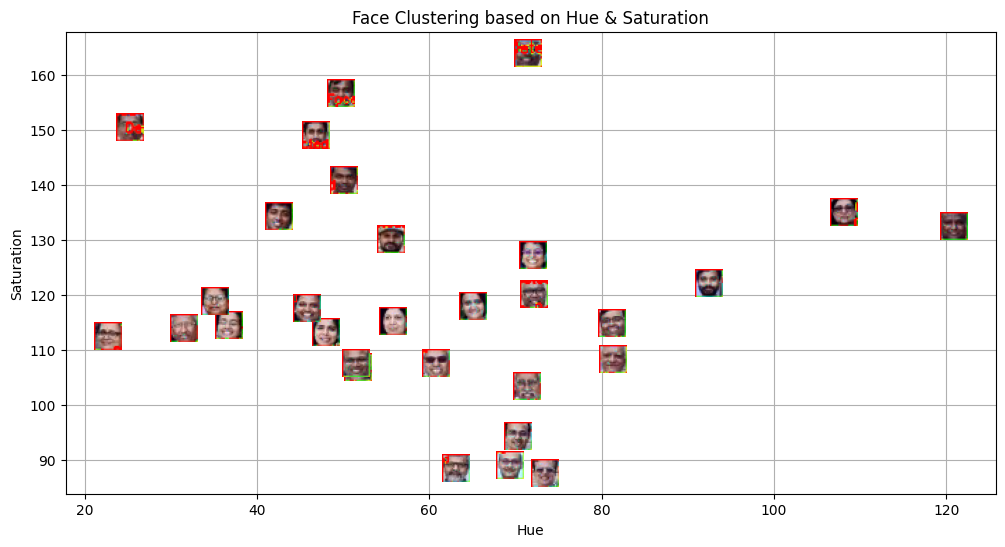

In [10]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering based on Hue & Saturation")
plt.grid(True)

# Show the plot
plt.show()

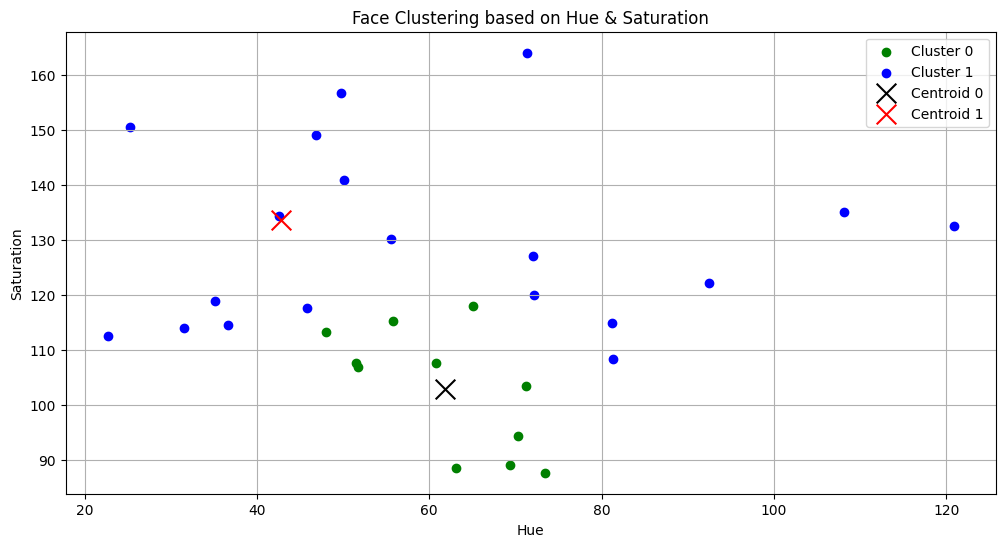

In [11]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label="Cluster 0")


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label="Cluster 1")

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], marker='x', s=200, color='black', label="Centroid 0")
plt.scatter(centroid_1[0], centroid_1[1], marker='x', s=200, color='red', label="Centroid 1")

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering based on Hue & Saturation")

plt.legend()


plt.grid(True)


plt.show()


In [12]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img =  cv2.imread("C:/Users/HP/Desktop/Sem4/Dr_Shashi_Tharoor.jpg")
gray_template = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(gray_template, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow("Detected Face in Template Image", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

: 

: 

In [ ]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])  
template_saturation = np.mean(template_hsv[:, :, 1])  

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]


# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering Based on Hue & Saturation")
plt.grid(True)

plt.show()

In [ ]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0', alpha=0.6)

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1', alpha=0.6)

# Calculate and plot centroids for both the clusters
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1],c='orange', marker='X', s=200, label='Centroid 1')  
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("K-Means Clustering of Face Images Based on HSV Features")
plt.legend()
plt.grid(True)

plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

Ans1. 
1. Euclidean Distance
2. Manhattan Distance
3. Minkowski Distance 
4. Cosine Similarity
5. Hamming Distance 
6. Mahalanobis Distance
7. Chebyshev Distance


Ans2.
 1. Manhattan Distance-Applications in knowing distance between houses in organized cities, length of wire connections in an integrated circuit, etc.
 2.  Chebyshev distance is used quite often in computer-aided manufacturing applications such as in drilling machines, laser cutters, etc.
 3.  It is often used in warehouse logistics to calculate time taken by an overhead crane to move an object.
 4. Cosine distance is often used in finding similarities between documents, recommender systems, computing cohesion within clusters in unsupervised learning, human pose matching based on joint coordinates, etc.

Ans3. 
1. Euclidean Distance – Measures straight-line distance between points.
2. Manhattan Distance – Measures distance by summing absolute differences (grid-like movement).
3. Minkowski Distance – Generalized form of Euclidean and Manhattan distances.
4. Cosine Similarity – Measures the angle between two vectors, used in text analysis.
5. Hamming Distance – Counts differences in binary strings, used in error detection.
6. Mahalanobis Distance – Considers correlations between features, useful in anomaly detection.
7. Chebyshev Distance-It is defined on a vector space where the distance between two vectors is the greatest of their differences along any coordinate dimension.


Ans4. 
1. Helps in tuning hyperparameters like k in KNN.
2. Reduces overfitting by validating on different subsets of data.
3. Provides a more reliable estimate of model accuracy.

Ans5. 
High 
𝑘
k (large neighbors count) → High bias, low variance (simpler model, may underfit).
Low 
𝑘
k (small neighbors count) → Low bias, high variance (more flexible, may overfit).
Optimal 
𝑘
k balances bias and variance for better predictions.